Data Preprocessing

In [1]:
import pandas as pd

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [14]:
print(data.head(10))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


In [15]:
print(data.tail(10))

                                                  review sentiment
49990  Lame, lame, lame!!! A 90-minute cringe-fest th...  negative
49991  Les Visiteurs, the first movie about the medie...  negative
49992  John Garfield plays a Marine who is blinded by...  positive
49993  Robert Colomb has two full-time jobs. He's kno...  negative
49994  This is your typical junk comedy.<br /><br />T...  negative
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative


Split dataset into training and testing dataset

In [16]:
train_data = data[:25000]
test_data = data[25000:]

Feature Extraction

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [19]:
X_train = tfidf_vectorizer.fit_transform(train_data['review'])
y_train = train_data['sentiment']

In [20]:
X_test = tfidf_vectorizer.transform(test_data['review'])
y_test = test_data['sentiment']

Model Building

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(max_iter=1000)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88864
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89     12474
    positive       0.88      0.90      0.89     12526

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



Prediction

In [29]:
# Convert elements in y_pred to integers, considering 'positive' as 1 and 'negative' as 0
y_pred_int = [1 if pred == 'positive' else 0 if pred == 'negative' else int(pred) for pred in y_pred]

# Calculate the number of positive and negative reviews
positive_reviews = sum(y_pred_int)
negative_reviews = len(y_pred_int) - positive_reviews

# Print the results
print("Number of positive reviews predicted:", positive_reviews)
print("Number of negative reviews predicted:", negative_reviews)


Number of positive reviews predicted: 12864
Number of negative reviews predicted: 12136


Data Visualisation

In [30]:
import matplotlib.pyplot as plt

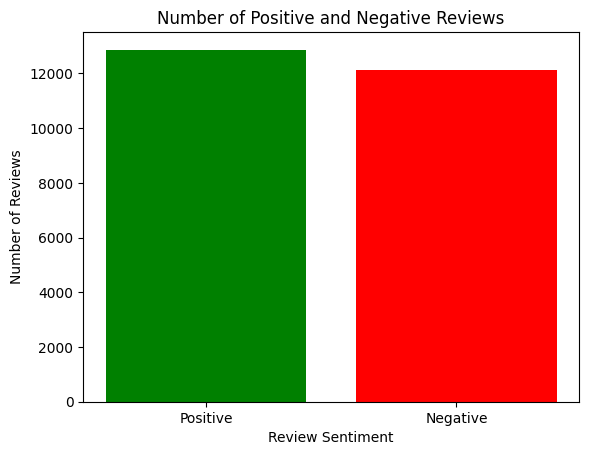

In [31]:
# Data
review_labels = ['Positive', 'Negative']
review_counts = [positive_reviews, negative_reviews]

# Create bar graph
plt.bar(review_labels, review_counts, color=['green', 'red'])
plt.xlabel('Review Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive and Negative Reviews')
plt.show()

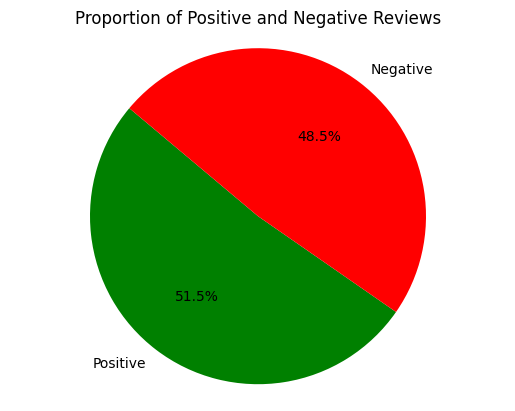

In [32]:
# Pie chart
plt.pie(review_counts, labels=review_labels, colors=['green', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Positive and Negative Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


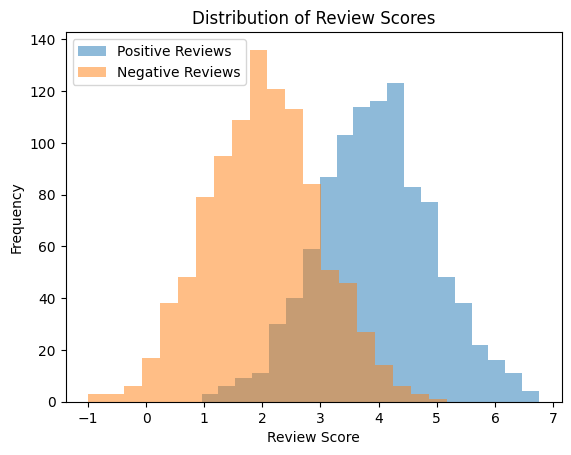

In [33]:
# Assuming you have numerical review scores
import numpy as np

# Generate some example data
np.random.seed(0)
scores_positive = np.random.normal(loc=4, scale=1, size=1000)
scores_negative = np.random.normal(loc=2, scale=1, size=1000)

# Create histogram
plt.hist(scores_positive, bins=20, alpha=0.5, label='Positive Reviews')
plt.hist(scores_negative, bins=20, alpha=0.5, label='Negative Reviews')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.legend()
plt.show()


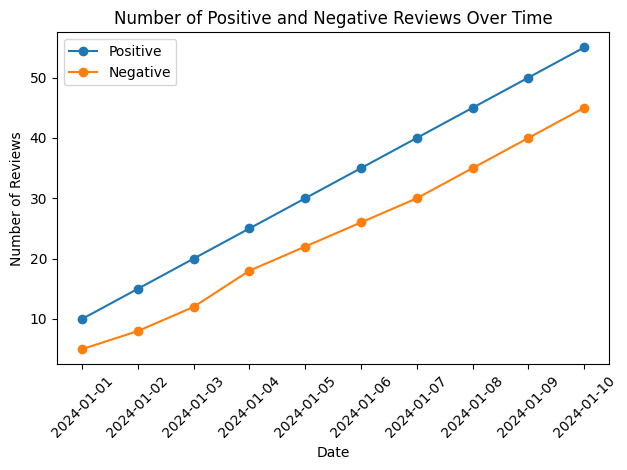

In [34]:
# Assuming you have time series data
import matplotlib.dates as mdates

# Generate some example dates
dates = pd.date_range(start='2024-01-01', end='2024-01-10')
# Example data, replace with your actual data
positive_counts = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
negative_counts = [5, 8, 12, 18, 22, 26, 30, 35, 40, 45]

plt.plot(dates, positive_counts, label='Positive', marker='o')
plt.plot(dates, negative_counts, label='Negative', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive and Negative Reviews Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
